In [1]:
rootf = './'

In [33]:
%pylab inline
%load_ext autoreload
%autoreload 2
#---------------------------------
# # For clustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy as sc
# #---------------------------------
import sys
sys.path.append('./functions') 
from save_load import *
from functions_NO_MEA import*

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/matias/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['exp']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Load data

In [34]:
# Get Chirp stim profile
def get_euler():
    vec_path = rootf + '/data/'
    vec_path = vec_path + r"chirp.vec"
    euler_vec = np.genfromtxt(vec_path)

    return euler_vec

In [37]:
Fsave = rootf + 'data/MEA_Data/pckls_ID/'

Exps = [4,5,7,8]
new_labels = {}
Exp_sorted_types_Ca = {}
cell_data = {}
Selected_cells = {}
model = {}
psth_z = {}

for exp in Exps:
    #----------------------
    # TO SELECT GROUP 32
    # Labels of the group of each cell for all cells
    fsave = Fsave + 'exp'+str(exp) + '_celltype_baden'
    new_labels[exp] = load_obj(fsave)

    #----------------------

    # CELL DATA
    # All data of the cells
    fsave = Fsave + 'exp'+str(exp) + '_celldataID'
    cell_data[exp] = load_obj(fsave)
    #---------------
    
    #---------------------
    # numberID of cells analysed
    fsave = Fsave + 'exp'+str(exp) + '_selected_cells'
    Selected_cells[exp] = np.array(load_obj(fsave))
    
    # experiment data Model is the previous classification
    fsave = Fsave + 'exp'+str(exp) + '_clustermodel'
    model0, psth_z0 = load_obj(fsave)
#     model[exp] = model0
    psth_z[exp] = psth_z0
    

# Select the group32 cells


15
7
19
13
Tot cells group 32:  54


{4: array([ 7,  9, 21, 34, 45, 50, 57, 58, 59, 60, 63, 64, 66, 70, 88]),
 5: array([ 1,  6,  8, 13, 16, 23, 24]),
 7: array([ 17,  22,  23,  36,  37,  44,  46,  49,  56,  60,  70,  76,  85,
         87, 105, 114, 121, 140, 148]),
 8: array([17, 26, 30, 39, 42, 44, 45, 49, 66, 70, 71, 73, 79])}

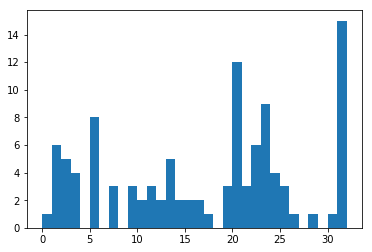

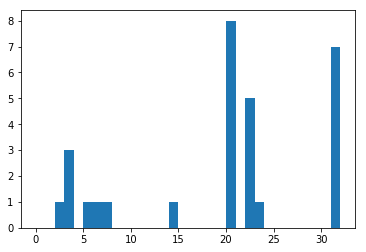

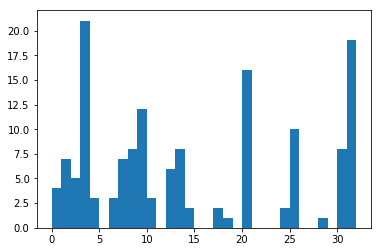

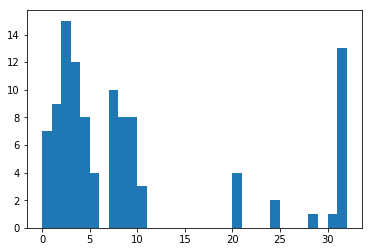

In [38]:
tot_32 = 0
sel32_ids = {}
for exp in Exps:
    figure()
    hist(new_labels[exp],np.arange(33))
    print(len(np.where(new_labels[exp]==31)[0]))
    tot_32+=len(np.where(new_labels[exp]==31)[0])
    sel32_ids[exp] = np.where(new_labels[exp]==31)[0]
print('Tot cells group 32: ',tot_32)

# Order of cell in the list to use
sel32_ids

# Example cells in exp 4
Selected_cells[4][sel32_ids[4]]

sel32_ids

In [39]:
Cell_ID
sel32_ids

{4: array([ 7,  9, 21, 34, 45, 50, 57, 58, 59, 60, 63, 64, 66, 70, 88]),
 5: array([ 1,  6,  8, 13, 16, 23, 24]),
 7: array([ 17,  22,  23,  36,  37,  44,  46,  49,  56,  60,  70,  76,  85,
         87, 105, 114, 121, 140, 148]),
 8: array([17, 26, 30, 39, 42, 44, 45, 49, 66, 70, 71, 73, 79])}

# Cell typing

4 7 206
4 9 255
4 21 367
4 34 580
4 45 776
4 50 894
4 57 967
4 58 995
4 59 998
4 60 999
4 63 1012
4 64 1020
4 66 1026
4 70 1042
4 88 1116
5 1 205
5 6 518
5 8 640
5 13 859
5 16 1153
5 23 1238
5 24 1281
7 17 167
7 22 190
7 23 208
7 36 501
7 37 529
7 44 601
7 46 639
7 49 680
7 56 776
7 60 787
7 70 935
7 76 970
7 85 1026
7 87 1044
7 105 1096
7 114 1150
7 121 1168
7 140 1244
7 148 1322
8 17 188
8 26 249
8 30 281
8 39 398
8 42 455
8 44 458
8 45 461
8 49 515
8 66 648
8 70 694
8 71 695
8 73 705
8 79 722


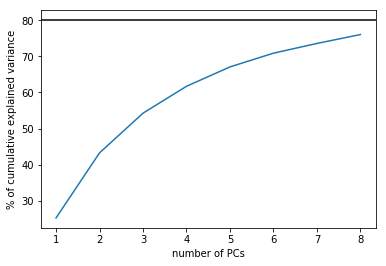

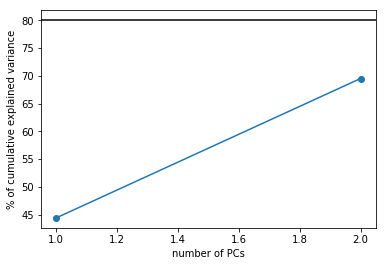

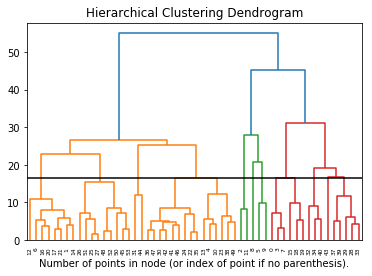

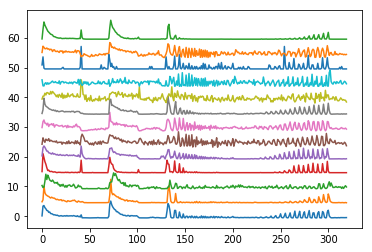

Number of clusters:  13
cluster size : 9


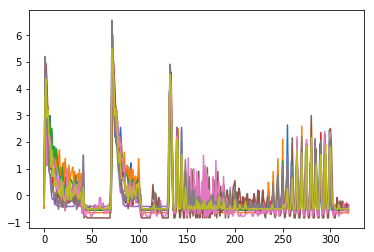

cluster size : 6


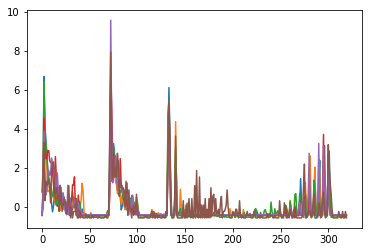

cluster size : 2


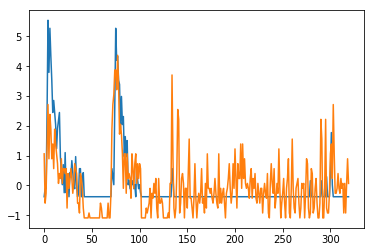

cluster size : 5


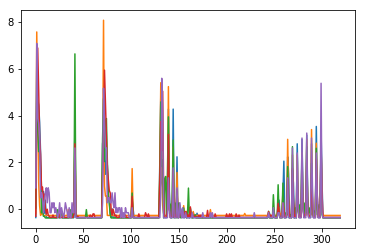

cluster size : 3


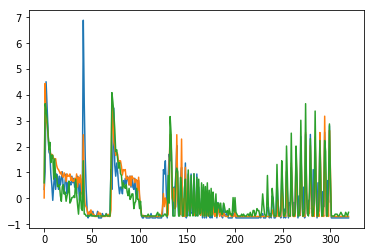

cluster size : 2


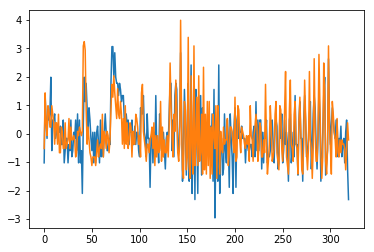

cluster size : 3


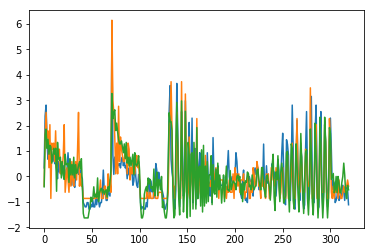

cluster size : 8


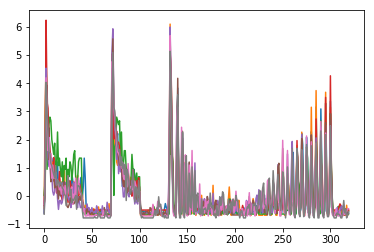

cluster size : 1


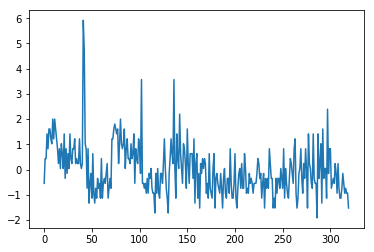

cluster size : 2


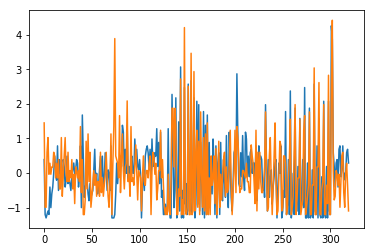

cluster size : 1


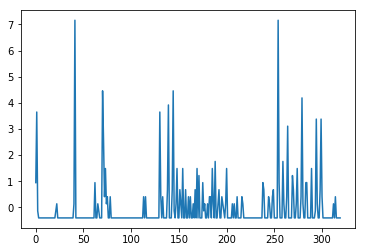

cluster size : 3


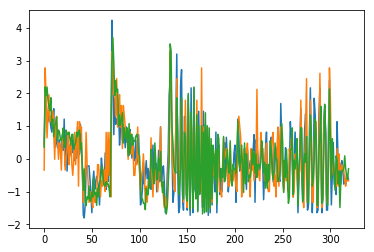

cluster size : 9


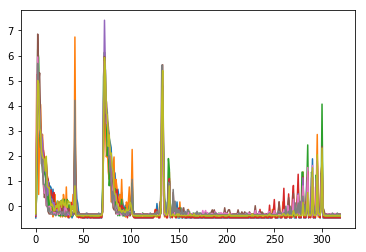

In [40]:
import scipy as sc
from sklearn.decomposition import SparsePCA
sparse=False
# change dist_thres to adapt the cut of the dendrogram and select the number of clusters
#####################################################################
dist_thres = 16.4  
#####################################################################

n_cells = tot_32
#-----------------------------------
#-----------------------------------
# Get Euler PCA
n_rep = 20 # nb of repeats
nt = 32 # total length
dt = 0.1 # bin size
time_bins = np.arange(0,nt+dt,dt)

spikes = np.zeros((n_cells, int(nt/dt), n_rep))

Cell_ID = {}

cell_count=0
for exp in Exps:
    for cell_index in sel32_ids[exp]:
        
        spike_cell = cell_data[exp][cell_index]['chirp_spike_trains_c1']
        for rep in range(n_rep):
            temp=np.histogram(spike_cell[rep], bins=time_bins)
            spikes[cell_count,:,rep] = temp[0]
            
        print(exp, cell_index,  Selected_cells[exp][cell_index])
        
        Cell_ID[cell_count] = [exp,cell_index,Selected_cells[exp][cell_index]]
        cell_count+=1
        
#-------------------------
# Pre process the PSTH
psth = np.mean(spikes, 2)
psth_z = scipy.stats.zscore(psth, 1)

# Select number of PCs to keep (here 8 explain ~80% of the variance)
#####################################################################
n_components_psth = 8  
#####################################################################
if sparse:
   pca_transformer = SparsePCA(n_components_psth, random_state=0).fit(psth_z)
else:
   pca_transformer = PCA(n_components_psth).fit(psth_z)
psth_pca = pca_transformer.transform(psth_z)
# -----------------------------------
# -----------------------------------
# Get checkerboard STA PCA
STA_time_course = np.zeros((n_cells,40))  #21 data points for these STAs
cell_count=0
for exp in Exps:
    for cell_index in sel32_ids[exp]:
        TempSTA_cell = cell_data[exp][cell_index]["temporal_sta_c1"]
        STA_time_course[cell_count] = TempSTA_cell
        cell_count+=1
#---------------------------
# Pre process the STA
sta_tc = sc.stats.zscore(STA_time_course[:,:], 1)
#####################################################################
n_components_sta_tc = 2
#####################################################################
if n_components_sta_tc>0:
    pca_transformer2 = PCA(n_components_sta_tc).fit(sta_tc)
    sta_tc_pca = pca_transformer2.transform(sta_tc)
#-----------------------------------
#-----------------------------------
if not sparse:
    plt.plot(np.arange(n_components_psth)+1, np.cumsum(pca_transformer.explained_variance_ratio_)*100)
    plt.axhline(y=80, color='k')
    plt.xlabel('number of PCs')
    plt.ylabel('% of cumulative explained variance')
    plt.show()

    if n_components_sta_tc>0:
        plt.plot(np.arange(n_components_sta_tc)+1, np.cumsum(pca_transformer2.explained_variance_ratio_)*100,'o-')
        plt.axhline(y=80, color='k')
        plt.xlabel('number of PCs')
        plt.ylabel('% of cumulative explained variance')
        plt.show()
#-----------------------------------
#-----------------------------------
cluster_dataset = np.zeros((n_cells, n_components_psth+n_components_sta_tc+1))
cluster_dataset[:,:n_components_psth] = psth_pca
if n_components_sta_tc>0:
    cluster_dataset[:,n_components_psth:n_components_psth+n_components_sta_tc] = sta_tc_pca

ell_size=np.zeros(tot_32)
cell_count=0
for exp in Exps:
    for cell_index in sel32_ids[exp]:
#     width,height = cell_data[cell_index]["ellipseSigmaXY"]
        ell_size[cell_count] = cell_data[exp][cell_index]["ellipseSize_c1"]   #np.abs(np.pi*width*height)
        cell_count+=1
    
ell_size_temp = -np.ones(n_cells)
temp = ell_size[:]-ell_size[:].min()
ell_size_temp[:] = temp/temp.max()
cluster_dataset[:,-1] = ell_size_temp
#-----------------------------------
#-----------------------------------

# perform agglomerative clustering
model = AgglomerativeClustering(distance_threshold=dist_thres, n_clusters=None)
#model = model.fit(psth_pca)
model = model.fit(cluster_dataset)

# plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=0)
plt.axhline(dist_thres, color='k')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# plot the cluster centroids
n_clusts = len(np.unique(model.labels_))
plt.figure()
for iclust in range(n_clusts):
    idx_cluster = np.where(model.labels_==iclust)[0]
    plt.plot(np.mean(psth_z[idx_cluster,:], 0) + iclust * 5)
plt.show() 
    
print('Number of clusters: ',len(np.unique(model.labels_)))

# plot the psths of all cells in one cluster
for icluster in range(len(np.unique(model.labels_))):
    # icluster = 0
    idx_cluster = np.where(model.labels_==icluster)[0]
    print(f'cluster size : {len(idx_cluster)}')
    plt.figure()
    plt.plot(psth_z[idx_cluster,:].transpose())
    plt.show()

# Create a summary figure for each cluster type

In [41]:
from matplotlib import gridspec

for icluster in range(len(np.unique(model.labels_)))[0:]:


    idx_cluster = np.where(model.labels_==icluster)[0]
#     print(idx_cluster)
    print(len(idx_cluster))

    gs = gridspec.GridSpec(len(idx_cluster)+2,6)
    
    #subplot2grid((3,3), (0,0), colspan=2, rowspan=3)
    if len(idx_cluster)<7:
        yspan = 2
    else:
        yspan=-2
    fig=figure(figsize=(14,(len(idx_cluster)+yspan)*1.75))
    #axs = fig.add_subplot(nrows=len(idx_cluster)+1, ncols=3, figsize=(16,16))
    plt.suptitle("Cell group {}.\n {} cells.".format(icluster, len(idx_cluster)))

    #-------------------------------
    # Loop cells in cluster
    line = 2
    STAs=np.zeros(40)
    STAcount=0
    waves=np.zeros(101)
    wavecount=0
    for cell_nb in sorted(idx_cluster):
        
        exp,cell_idx, cell_name = Cell_ID[cell_nb]  
        
        #-----------------
        # Plot temp STA
        ax= subplot(gs[line,1])
        
        ax.set_ylim([-0.75,0.75])
        ax.axis("off")
#         ax.set_aspect(0.075)
        ax.step(np.linspace(-40/30,0,40),cell_data[exp][cell_idx]["temporal_sta_c1"],'k',lw=3)
        polarity = cell_data[exp][cell_idx]["polarity_c1"]
        ax.set_title('Cluster Exp' + str(exp) +'  c'+str(cell_name) +'  Polarity '+str(int(polarity)))
        ax.axhline(0,color='k',lw=0.5)
        
        STAs+=cell_data[exp][cell_idx]["temporal_sta_c1"]
        STAcount+=1
        
        #-----------------
        # Plot temp STA avg
        ax= subplot(gs[0,1])
        
        ax.set_title('Temp STA')
        ax.set_ylim([-0.75,0.75])
        ax.plot(np.linspace(-40/30,0,40),cell_data[exp][cell_idx]["temporal_sta_c1"],lw=0.5)
        ax.axhline(0,color='k',lw=0.5)

        ax.set_xlabel('Time(s)')
        #-----------------
        # plot Spatial STA
        ax= subplot(gs[line,0])
                
        ax.imshow(cell_data[exp][cell_idx]["spatial_sta_c1"], cmap='gray',interpolation='gaussian')
        ax.set_xlim(15,35)
        ax.set_ylim(35,15)
        ax.set_aspect('equal')
        #ax.set_title('Cluster' + str(cell_nb))
        ax.set_xticks([])
        ax.set_yticks([])
       
        #----------------
        #plot waveform
        ax= subplot(gs[line,2])
        
        wave = cell_data[exp][cell_idx]["templates"]/abs(np.min(cell_data[exp][cell_idx]["templates"]))
        ax.plot(wave,'r')
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        waves+=wave
        wavecount+=1
        
        ax= subplot(gs[0,2])
        ax.plot(wave,lw=0.5)
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        #-----------------
        # plot EuCell_ID[cell_count] = [exp,cell_index,cell_id]ler
        ax= subplot(gs[line,3:])
        
        cell_index=cell_nb
        ax.plot(np.linspace(0,32,800),cell_data[exp][cell_idx]["psth_c1"])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticks([])
        plt.locator_params(axis="y", nbins=3)
        
#         ax= subplot(gs[0,3:])
#         ax.plot(np.linspace(0,32,800),cell_data[cell_nb]["psth"])
        #-----------------
        # plot Ellipse
        Ex=cell_data[exp][cell_idx]['ellipseMat_c1'][0]
        Ey=cell_data[exp][cell_idx]['ellipseMat_c1'][1]
        mx=np.mean(Ex)
        my=np.mean(Ey)

        #-----------------
        ax= subplot(gs[line,0])
        ax.plot(Ex,Ey,'yellow',alpha=0.5 )#,lw=10)    #rotated ellipse
        ax= subplot(gs[0,0])
        ax.plot(Ex,Ey,'k',lw=0.5 )#,lw=10)    #rotated ellipse
        line+=1
    #-----------------
    # avg STA
    STAs=STAs/STAcount
    ax= subplot(gs[0,1])
    ax.plot(np.linspace(-40/30,0,40),STAs,'k',lw=2)
    ax.set_ylim([-0.75,0.75])
#     ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # avg wave
    waves=waves/wavecount
    ax= subplot(gs[0,2])
    ax.set_title('Waveform')
    
    ax.plot(waves,'r',lw=2)
    ax.set_ylim([-1.25,1.25])
    #ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # size ellipses
    ax= subplot(gs[0,0])
    
    ax.set_title('Ellipses')
    ax.set_xlim([15,35])
    ax.set_ylim([35,15])
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
        
    #-----------------
    # mean psth
    ax= subplot(gs[0,3:])
    ax.set_title('Euler psth')
    
    ax.plot(np.linspace(0,32,320),np.mean(psth_z[idx_cluster,:], 0),'b')
    ax.axis("off")

    #-----------------
    # plot euler stim
    euler_vec= get_euler()
    ax= subplot(gs[1,3:])
    
    ax.plot(np.linspace(0,32,1600),euler_vec[150:1750,1], color='k')
    ax.set_yticks([])
    ax.set_ylim([-100,350])
    ax.set_xlabel('Time(s)')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax= subplot(gs[1,2])
    ax.text(0.5,0.5 ,"Chirp stimulus profile")
    ax.axis("off")
    
    PDF_folder = rootf + 'OUTPUT_NO_MEA/Cell_type32/'
    fsave = PDF_folder +'Type32_clustype' +str(icluster) 
    
    fig.savefig(fsave+'.png',format='png',dpi=250)
    close(fig)  
    
#     plt.savefig("Summary cell group {}".format(icluster))    
#     plt.show()
print('Done!')

9


/Users/matias/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


6
2
5
3
2
3
8
1
2
1
3
9
Done!


# Create an ID card for each cell

In [44]:
# More complicated ID card
ttext = ['native','  NO','  wo']
# for idx_cell in (range(len(selected_cells[0:]))):

# for index in range(1):

for cell_index in range(len(Cell_ID)):

#         cell_nb = idx_cell
    exp,cell_idx, cell_name = Cell_ID[cell_index]  
    print(exp,cell_idx,cell_name)


    # Create the figure
    fig = plt.figure(figsize=(20, 12))

    # the size of the marginal axes and the main axes in both directions.
    gs = gridspec.GridSpec(8, 8,
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.3, hspace=0.8)   
    gridspec.GridSpec
    try:
        cluster = model.labels_[cell_index]#[0]
    except:
        cluster=''

    cell_data[exp][cell_idx]["clus_ID"]=cluster

    plt.suptitle("exp{} _c{}  - Cluster_group_{} ".format(exp,cell_name,cluster), fontsize=20)
    #--------------------------------------------------
    # Plot the ISI
    ax = fig.add_subplot(gs[0:1, 3:4])
    ax.hist(cell_data[exp][cell_idx]['isi'], bins = 100, range=(0,0.05))
    rpv = cell_data[exp][cell_idx]['rpv']
    nb_rpv= cell_data[exp][cell_idx]['nb_rpv_spikes']
    ax.set_title("Interspike Interval histogram\n RPV = {}%. {}/{} spikes.".format(round(rpv,4), nb_rpv, cell_data[exp][cell_idx]["nb_spikes"]))
#     ax.set_xlabel("Interspike time (s)")
#     ax.set_ylabel("Number of spikes")
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axvline(0,color='k',lw=0.5)

    #--------------------------------------------------
    # Plot the cell's template
    ax = fig.add_subplot(gs[0:1, 4:5])
    wave = cell_data[exp][cell_idx]["templates"]/abs(np.min(cell_data[exp][cell_idx]["templates"]))
    ax.plot(np.linspace(-2.5,2.5,101),wave,color='r',lw=2)
    ax.set_title("Cell template")
#     ax.set_xlabel("Time (ms)")
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.axhline(0,color='k',lw=0.5)
    ax.set_ylim([-1.25,1.25])
    ax.set_yticks([])

    #--------------------------------------------------
    # Plot spatial STA
    for i in [0,1,2]:
        if i==0:spatial=cell_data[exp][cell_idx]['spatial_sta_c1']
        if i==1:spatial=cell_data[exp][cell_idx]['spatial_sta_no']
        if i==2:spatial=cell_data[exp][cell_idx]['spatial_sta_wo']

        ax = fig.add_subplot(gs[2+i*2:4+i*2, 4:5])
        if i==0:ax.text(14,11.35,"Spatial receptive field",size=12)
        spatial = spatial**2*sign(spatial)
        cmap='RdBu_r'
        im = ax.imshow(spatial, cmap=cmap,interpolation='gaussian')
        # plt.colorbar(im, ax=axs[1,2])
        abs_max = 0.5*max(np.max(spatial), abs(np.min(spatial)))
        im.set_clim(-abs_max,abs_max)

        u250 = 1/42*50*2  *2.5
        ax.set_xticks(np.arange(10)*u250)
        ax.set_xticklabels(labels = np.arange(10)*250-750)
        ax.set_yticks(np.arange(10)*u250)
        ax.set_yticklabels(labels = np.arange(10)*250-750)

        ax.set_xlim([15,35])
        ax.set_ylim([35,15])
        ax.set_xlabel(r'$\mu$ m')
        ax.set_ylabel('$\mu$ m            ')

    #--------------------------------------------------
    # Plot checkerboard repeated sequence raster
    for i in [0,1,2]:
        if i==0:check=cell_data[exp][cell_idx]['cb_spike_trains_c1']
        if i==1:check=cell_data[exp][cell_idx]['cb_spike_trains_no']
        if i==2:check=cell_data[exp][cell_idx]['cb_spike_trains_wo']    

        ax = fig.add_subplot(gs[2+i*2:3+i*2, 5:8])
        ax.eventplot(check, color='k', alpha=1,linelengths=1)
        if i==0:ax.set_title("Repeated white noise sequences")
#         ax.set_xlabel("Time (s)")
        ax.set_xlim([0,20])
        ax.set_ylim([0,None])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    #--------------------------------------------------
    # Plot checkerboard repeated sequence psth (superimposed)

        ax = fig.add_subplot(gs[3+i*2:4+i*2, 5:8])

        nb_rep=len(check)
        psthch = np.histogram(np.concatenate(check).tolist(), bins=linspace(0,20,601))[0]/nb_rep*1000/30
        ax.plot(np.linspace(0,20,600), psthch)
        if i==2: ax.set_xlabel("Time (s)")
        ax.set_xlim([0,20])
    #     ax.set_ylabel("Firing rate (spikes/s)")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        cell_data[exp][cell_idx]["check_psth"] = psthch

    #--------------------------------------------------
    # Plot temporal STA
    for i in [0,1,2]:
        if i==0:temporal=cell_data[exp][cell_idx]['temporal_sta_c1']
        if i==1:temporal=cell_data[exp][cell_idx]['temporal_sta_no']
        if i==2:temporal=cell_data[exp][cell_idx]['temporal_sta_wo']

        ax = fig.add_subplot(gs[2+i*2:4+i*2, 3:4])
        if i==0:ax.set_title("Temporal receptive field")
        ax.step(np.linspace(-40/30,0,40), temporal,color='k',lw=3)
        ax.set_xlabel("Time (s)")
        ax.axhline(0,color='k',lw=0.5)

        ax.set_yticks([])
        ax.axis('off')

    #--------------------------------------------------
    # Plot chirp psth
    for i in [0,1,2]:
        if i==0:psth=cell_data[exp][cell_idx]['psth_c1']
        if i==1:psth=cell_data[exp][cell_idx]['psth_no']
        if i==2:psth=cell_data[exp][cell_idx]['psth_wo']

        ax = fig.add_subplot(gs[3+i*2:4+i*2, 0:3])

        ax.plot(np.linspace(0,32,800), psth,lw=1)
        # ax.set_ylim(-5,2*np.max(data_20210316[cell_nb]["euler_full_field"]["psth"]))
        if i==2:ax.set_xlabel("Time (s)")
        ax.set_ylabel("Firing rate (spikes/s)")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlim(0, 32)

    #--------------------------------------------------
     # Plot euler raster
        ax = fig.add_subplot(gs[2+i*2:3+i*2, 0:3])
        if i==0:chirp=cell_data[exp][cell_idx]['chirp_spike_trains_c1']
        if i==1:chirp=cell_data[exp][cell_idx]['chirp_spike_trains_no']
        if i==2:chirp=cell_data[exp][cell_idx]['chirp_spike_trains_wo']

        ax.eventplot(chirp, color='k', alpha=1,linelengths=1,lw=1)
        ax.set_xlim(0, 32)
        ax.set_ylim(0, 20)
        # ax.set_yticks([])
        ax.set_ylabel("#Trial")
        if i==0:ax.set_title("Response to the chirp stimulus")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


        ax.text(-8,-5,ttext[i],size=20)


    #--------------------------------------------------
    # Plot euler stimulus profile (superimposed)
    ax = fig.add_subplot(gs[1:2, 0:3])
    ax.plot(np.linspace(0,32,1600),euler_vec[150:1750,1], color='k',lw=0.75)
    # ax.set_ylim(-800,300)
    ax.set_yticks([])
    ax.set_title("Chirp stimulus profile")
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0, 32)


    PDF_folder = rootf + '/OUTPUT_NO_MEA/Cell_ID32/'
    fsave = PDF_folder + 'group'+ str(cluster) +'_exp'+str(exp)+'_c' +str(cell_name) + '_ID' 

    fig.savefig(fsave+'.png',format='png',dpi=110)
    close(fig)  
print('Done!')

4 7 206
4 9 255
4 21 367
4 34 580
4 45 776
4 50 894
4 57 967
4 58 995
4 59 998
4 60 999
4 63 1012
4 64 1020
4 66 1026
4 70 1042
4 88 1116
5 1 205
5 6 518
5 8 640
5 13 859
5 16 1153
5 23 1238
5 24 1281
7 17 167
7 22 190
7 23 208
7 36 501
7 37 529
7 44 601
7 46 639
7 49 680
7 56 776
7 60 787
7 70 935
7 76 970
7 85 1026
7 87 1044
7 105 1096
7 114 1150
7 121 1168
7 140 1244
7 148 1322
8 17 188
8 26 249
8 30 281
8 39 398
8 42 455
8 44 458
8 45 461
8 49 515
8 66 648
8 70 694
8 71 695
8 73 705
8 79 722
Done!


# SAVE DATA

In [45]:
Fsave = rootf + '/data/MEA_Data/pckls_ID/'
fsave = Fsave + 'group32_celldataID'
save_obj(cell_data,fsave)

fsave = Fsave + 'clustermodel32'
save_obj([model,psth_z],fsave)

fsave = Fsave + 'selected_cells32'
save_obj(Cell_ID,fsave)